In [1]:
import pandas as pd
import glob
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import pickle
import sklearn
import numpy as np
import nltk 
nltk.download('punkt')
nltk.download('stopwords')

# stemmer = SnowballStemmer("german")

[nltk_data] Downloading package punkt to /home/pawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# pip install thefuzz

In [3]:
# from thefuzz import fuzz
# from thefuzz import process
# fuzz.ratio("vereinbarkeit von beruf", "vereinbarkeit von familie und beruf")

In [4]:
data = pd.read_csv("/home/pawan/Questionnaire_new_version.csv")

In [5]:
data

,Documents,file_name,Text,Ground_Truth
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',..."
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '..."
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung'
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'..."
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'"
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung'
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'..."
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung'


In [6]:
data['Ground_Truth'][8]

"'promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'"

In [7]:
file_name = ['Nacaps_2018','WeGe_W2','StuMa2020','Studierdenensurvey2016','Absolventen_20092_Haupt','Promopanel_W4','Studienberechtigte_2008.3',
'Wissenschaftlerbefragung2016','Promopanel_W3','Sozialerhebung20','WeGe_W3','Promopanel_W5','sid_corona','Promopanel_W2','Absolventen_2013-2','Absolventen_20092_Promotion',
'Sozialerhebung21','Absolventen_20092_Mobilität','Sozialerhebung19']

In [8]:
GT_within_text = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'vereinbarkeit von familie und beruf', 'promovierende', 'promotion', 'finanzierung', 'mobilität', 'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten','weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung','wissenschaftliche aktivitäten', 'auslandsaufenthalt', 'gesundheit'],
 ['digitale lehre', 'wohnsituation', 'finanzielle situation', 'studiensituation', 'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [9]:
keywords_within_text = []
for i in range(len(GT_within_text)):
    keywords_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) == 1:
            keywords_within_text[i].append(GT_within_text[i][j])

In [10]:
keyphrases_within_text = []
for i in range(len(GT_within_text)):
    keyphrases_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) > 1:
            keyphrases_within_text[i].append(GT_within_text[i][j])

In [11]:
only_keywords = []
for i in range(len(GT_within_text)):
    only_keywords.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) == 1:
            only_keywords[i].append(GT_within_text[i][j])

In [12]:
only_keywords

[['wissenschaftssystem',
  'betreuung',
  'promovierende',
  'promotion',
  'finanzierung',
  'mobilität',
  'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion',
  'arbeitsbedingungen',
  'weiterbildung',
  'auslandsaufenthalt',
  'gesundheit'],
 ['wohnsituation', 'studiensituation', 'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [13]:
gt = list(data['Ground_Truth'])

In [14]:
gt

["'wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'promotionsformen', 'promotionsmotive', 'vereinbarkeit von familie und beruf', 'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs', 'promotionsabbruch', 'promovierende', 'promotion', 'strukturierte promotion', 'persönlichkeit', 'finanzierung', 'mobilität', 'gesundheit', 'erwerbsverläufe', 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft', 'promovierte'",
 "'integration', 'geflüchtete', 'studienkolleg', 'migration', 'studienvorbereitung'",
 "'beruflicher verbleib von exmatrikulierten', 'studiensituation', 'studienabbruch', 'masterstudium', 'abbruchursachen'",
 "'evaluation', 'qualifikation', 'effizienz', 'studiensituation', 'zeitreihen', 'studierendenbefragung', 'hochschulforschung'",
 "'hochschulforschung'",
 "'promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbe

In [15]:
ground_truth_not_in_text = [['promotionsformen', 'promotionsmotive',  'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs','promotionsabbruch', 'strukturierte promotion', 'persönlichkeit', 'erwerbsverläufe', 'promovierte'],
                            ['integration', 'migration'], 
                            ['beruflicher verbleib von exmatrikulierten', 'studiensituation', 'studienabbruch', 'abbruchursachen'],
                            ['effizienz, zeitreihen', 'studierendenbefragung', 'hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'],
                            ['studienberechtigte', 'hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'],
                            ['hochschulforschung'],
                            ['integration', 'migration'], 
                            ['hochschulforschung'], 
                            ['internationale studierende', 'finanzielle situation', 'studienerfolg', 'erwerbstätige studierende', 'persönlichkeit', 'beeinträchtigt studierende', 'studierende', 'gesundheit', 'studierendenforschung', 'hochschulforschung'],
                            ['hochschulforschung'],
                            ['absolventen', 'hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung']]

In [16]:
ground_truth_not_in_text

[['promotionsformen',
  'promotionsmotive',
  'monetäre erträge',
  'nicht-monetäre erträge',
  'wissenschaftlicher nachwuchs',
  'promotionsabbruch',
  'strukturierte promotion',
  'persönlichkeit',
  'erwerbsverläufe',
  'promovierte'],
 ['integration', 'migration'],
 ['beruflicher verbleib von exmatrikulierten',
  'studiensituation',
  'studienabbruch',
  'abbruchursachen'],
 ['effizienz, zeitreihen', 'studierendenbefragung', 'hochschulforschung'],
 ['hochschulforschung'],
 ['hochschulforschung'],
 ['studienberechtigte', 'hochschulforschung'],
 ['hochschulforschung'],
 ['hochschulforschung'],
 ['hochschulforschung'],
 ['integration', 'migration'],
 ['hochschulforschung'],
 ['internationale studierende',
  'finanzielle situation',
  'studienerfolg',
  'erwerbstätige studierende',
  'persönlichkeit',
  'beeinträchtigt studierende',
  'studierende',
  'gesundheit',
  'studierendenforschung',
  'hochschulforschung'],
 ['hochschulforschung'],
 ['absolventen', 'hochschulforschung'],
 ['ho

In [17]:
data['Valid_Ground_Truth'] = GT_within_text

In [18]:
data

,Documents,file_name,Text,Ground_Truth,Valid_Ground_Truth
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch...","[wissenschaftssystem, betreuung, wissenschaftl..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',...","[geflüchtete, studienkolleg, studienvorbereitung]"
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '...",[masterstudium]
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's...","[evaluation, qualifikation, studiensituation]"
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung',[]
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...","[promotion, arbeitsbedingungen, wissenschaftli..."
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'",[]
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung',[]
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...","[promotion, arbeitsbedingungen, wissenschaftli..."
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung',[]


In [19]:
data['Ground_Truth_Not_In_Text'] = ground_truth_not_in_text

In [20]:
data

,Documents,file_name,Text,Ground_Truth,Valid_Ground_Truth,Ground_Truth_Not_In_Text
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch...","[wissenschaftssystem, betreuung, wissenschaftl...","[promotionsformen, promotionsmotive, monetäre ..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',...","[geflüchtete, studienkolleg, studienvorbereitung]","[integration, migration]"
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '...",[masterstudium],"[beruflicher verbleib von exmatrikulierten, st..."
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's...","[evaluation, qualifikation, studiensituation]","[effizienz, zeitreihen, studierendenbefragung,..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung',[],[hochschulforschung]
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...","[promotion, arbeitsbedingungen, wissenschaftli...",[hochschulforschung]
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'",[],"[studienberechtigte, hochschulforschung]"
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung',[],[hochschulforschung]
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...","[promotion, arbeitsbedingungen, wissenschaftli...",[hochschulforschung]
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung',[],[hochschulforschung]


In [21]:
# file_list3 = ["/home/pawan/website_keywords_also_exist_within_thesaurus/" + elem + ".txt" for elem in file_name]                  
# GT_within_thesaurus = []

# for file_path in file_list3:
#     with open(file_path) as f_input:
#         GT_within_thesaurus.append(f_input.read())

In [22]:
GT_within_thesaurus_not_in_text = ['Promotion, persönlichkeit', 'integration,migration', 'studiensituation, studienabbruch', 'Effizienz, zeitreihen, hochschulforschung',
                                  'hochschulforschung','hochschulforschung', 'hochschulforschung', 'hochschulforschung', 'hochschulforschung', 'hochschulforschung',
                                   'integration,migration', 'hochschulforschung', 'finanzielle Situation, Studienerfolg, Persönlichkeit, Gesundheit Hochschulforschung', 
                                  'Hochschulforschung', 'Hochschulforschung', 'hochschulforschung', 'hochschulforschung', 'hochschulforschung','hochschulforschung']

In [23]:
GT_within_thesaurus_not_in_text

['Promotion, persönlichkeit',
 'integration,migration',
 'studiensituation, studienabbruch',
 'Effizienz, zeitreihen, hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'integration,migration',
 'hochschulforschung',
 'finanzielle Situation, Studienerfolg, Persönlichkeit, Gesundheit Hochschulforschung',
 'Hochschulforschung',
 'Hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'hochschulforschung']

In [24]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können",'hs', "bzw",'abt','fuer','kuenste', 'bw','tu','kath',  "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl","ca", "fil", "bmbf", "monat","zofar", "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","welch", "manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
890


In [25]:
stop_words

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [26]:
# def clean_text(text, for_embedding=False):
#     """
#         - remove any html tags (< /br> often found)
#         - Keep only ASCII + European Chars and whitespace, no digits
#         - remove single letter chars
#         - convert all whitespaces (tabs etc.) to single wspace
#         if not for embedding (but e.g. tdf-idf):
#         - all lowercase
#         - remove stopwords, punctuation and stemm
#     """
#     RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
#     RE_TAGS = re.compile(r"<[^>]+>")
#     RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
#     RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
# #     if for_embedding:
#         # Keep punctuation
# #         RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
# #         RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

#     text = re.sub(RE_TAGS, " ", text)
#     text = re.sub(RE_ASCII, " ", text)
#     text = re.sub(RE_SINGLECHAR, " ", text)
#     text = re.sub(RE_WSPACE, " ", text)

#     word_tokens = word_tokenize(text)
#     words_tokens_lower = [word.lower() for word in word_tokens]

#     if for_embedding:
#         # no stemming, lowering and punctuation / stop words removal
#         words_filtered = word_tokens
#     else:
#         words_filtered = [
#             word for word in words_tokens_lower if word not in stop_words
#         ] 

#     text_clean = " ".join(words_filtered)
#     return text_clean

In [27]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
         #Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž.! ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [28]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

In [29]:
data["clean_text"][0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren . Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben . Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden . Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden . Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert . In der Zwischenzeit kann sich daran etwas geändert haben . Bitte geben Sie an was aktuell auf Sie zutrifft . Ich promoviere . Ich habe das Promotionsverfahren abgeschlossen . Ich habe mein Promotionsvorhaben unterbrochen . Ich habe mein Promotionsvorhaben abgebrochen . Handelt es sich um eine offiziell der Hoch

In [30]:
Preprocesed_text = []
for i in range(len(data["clean_text"])):
    Preprocesed_text.append(re.sub(r'\s([?.!"](?:\s|$))', r'\1', data["clean_text"][i]))  

In [31]:
import re
test_text = []
for i in range(len(Preprocesed_text)):
    test_text.append(re.sub(r'\.+ ', ".",  Preprocesed_text[i]))

In [32]:
cleaned_text = []
for i in range(len(test_text)):
    for line in test_text[i].split('\n'):
        # Replace multiple dots with space
        line = re.sub('\.\.+', '.', line) 
        # Remove single dots
        cleaned_text.append(re.sub('\.', '.', line))

In [33]:
final_cleaned_text = []
for i in range(len(cleaned_text)):
    final_cleaned_text.append(re.sub(r"\.(?=\S)", ". ", cleaned_text[i]))

In [34]:
data['final_cleaned_text'] = final_cleaned_text

In [35]:
data['final_cleaned_text'][0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren. Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben. Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden. Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden. Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert. In der Zwischenzeit kann sich daran etwas geändert haben. Bitte geben Sie an was aktuell auf Sie zutrifft. Ich promoviere. Ich habe das Promotionsverfahren abgeschlossen. Ich habe mein Promotionsvorhaben unterbrochen. Ich habe mein Promotionsvorhaben abgebrochen. Handelt es sich um eine offiziell der Hochschule geme

In [36]:
data["clean_text_wo_sw"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

In [37]:
data["clean_text_wo_sw"][0]

'hochschule dezember promotion registriert ebenfalls interesse promotionsbedingungen promovierenden erfahren doppelbefragungen vermeiden innerhalb fragebogens angegebenen antworten hochschule zweck qualitätssicherung evaluation bereich doktorandenausbildung einverständnis vorausgesetzt weitergabe angaben hochschule einverstanden weitergabe angaben hochschule einverstanden anfang dezember hochschule offiziell doktorand registriert zwischenzeit geändert aktuell zutrifft promoviere promotionsverfahren abgeschlossen promotionsvorhaben unterbrochen promotionsvorhaben abgebrochen handelt offiziell hochschule gemeldete unterbrechung erinnern quartal arbeiten begonnen erinnern quartal zugelassen quartal quartal quartal quartal hochschule informiert promotion abgebrochen erinnern quartal promotion abgebrochen quartal quartal quartal quartal promotionsverfahren hochschule ausland beteiligt handelt gemeinsamen abschluss hochschulen ausland cotutelle de thèse promotionsverfahren fachhochschule hoc

In [38]:
final_cleaned_text

['Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren. Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben. Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden. Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden. Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert. In der Zwischenzeit kann sich daran etwas geändert haben. Bitte geben Sie an was aktuell auf Sie zutrifft. Ich promoviere. Ich habe das Promotionsverfahren abgeschlossen. Ich habe mein Promotionsvorhaben unterbrochen. Ich habe mein Promotionsvorhaben abgebrochen. Handelt es sich um eine offiziell der Hochschule gem

In [39]:
# import spacy
# nlp = spacy.load('de_core_news_md')

# mails=['In welchem Bundesland haben Sie Ihre Hochschulzugangsberechtigung erworben']

# mails_lemma = []

# for mail in mails:
#      doc = nlp(mail)
#      result = ' '.join([x.lemma_ for x in doc]) 
#      mails_lemma.append(result)

In [40]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [41]:
#using spacy model for POS tagging

Extracted_tags=[]
for i in range(len(data['final_cleaned_text'])):
    Extracted_tags.append([])
    doc = nlp(data['final_cleaned_text'][i])
    for t in doc:
        tag=t.pos_
        if tag: # for Noun, only "NOUN"
            if t.text not in Extracted_tags:
                Extracted_tags[i].append((t.text, t.pos_))  #for appending to it as a tuples: constructing a tuple

In [42]:
Extracted_tags[5]

[('Waren', 'NOUN'),
 ('oder', 'CCONJ'),
 ('sind', 'AUX'),
 ('Sie', 'PRON'),
 ('seit', 'ADP'),
 ('der', 'DET'),
 ('letzten', 'ADJ'),
 ('Befragung', 'NOUN'),
 ('im', 'ADP'),
 ('in', 'ADP'),
 ('irgendeiner', 'DET'),
 ('Form', 'NOUN'),
 ('erwerbstätig', 'ADV'),
 ('.', 'PUNCT'),
 ('Bitte', 'PART'),
 ('geben', 'VERB'),
 ('Sie', 'PRON'),
 ('mit', 'ADP'),
 ('Hilfe', 'NOUN'),
 ('der', 'DET'),
 ('Zeilennummern', 'NOUN'),
 ('an', 'ADP'),
 ('bei', 'ADP'),
 ('welcher', 'DET'),
 ('Stelle', 'NOUN'),
 ('es', 'PRON'),
 ('sich', 'PRON'),
 ('um', 'ADP'),
 ('Ihre', 'DET'),
 ('aktuelle', 'ADJ'),
 ('Stelle', 'NOUN'),
 ('handelt', 'VERB'),
 ('.', 'PUNCT'),
 ('Handelt', 'VERB'),
 ('es', 'PRON'),
 ('sich', 'PRON'),
 ('bei', 'ADP'),
 ('Ihrer', 'DET'),
 ('letzten', 'ADJ'),
 ('beruflichen', 'ADJ'),
 ('Station', 'NOUN'),
 ('um', 'ADP'),
 ('dieselbe', 'DET'),
 ('Stelle', 'NOUN'),
 ('die', 'DET'),
 ('Sie', 'PRON'),
 ('zum', 'ADP'),
 ('Zeitpunkt', 'NOUN'),
 ('der', 'DET'),
 ('letzten', 'ADJ'),
 ('Befragung', 'NOUN'),

In [132]:
from germalemma import GermaLemma
lemmatizer = GermaLemma()
lemmatized_words = []
nlp = spacy.load('de_core_news_lg')

for i in range(len(Extracted_tags)):
    lemmatized_words.append([])
    lemma_spacy = nlp(final_cleaned_text[i])
    for j in range(len(lemma_spacy)):
        token = lemma_spacy[j]
        if token.pos_ not in ['NOUN','ADJ', 'VERB','ADV']:
            lemmatized_words[i].append((token.lemma_))
        else:
            #pass
            temp = Extracted_tags[i][j][1]
            lemmatized_words[i].append(lemmatizer.find_lemma(Extracted_tags[i][j][0], Extracted_tags[i][j][1]))


In [133]:
# converting the list of tokens into string
lemmatized_corpus = [' '.join(x) for x in lemmatized_words]

In [134]:
lemmatized_corpus[0]

'der Hochschule an der ich im Dezember zur Promotion registrieren sein haben ebenfalls Interesse daran mehr über der Promotionsbedingung sich Promovierenden zu erfahren . um Doppelbefragung zu vermeiden mögen ich der von ich innerhalb dies Fragebogen angegeben Antwort an mein Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung mein Einverständnis voraussetzen weiter geben . Ja ich sein mit der Weitergabe sich Angabe an der Hochschule einverstand . Nein ich sein mit der Weitergabe sich Angabe an der Hochschule nicht einverstand . Anfang Dezember sein ich an sich Hochschule offiziell als Doktorand in registrieren . In der Zwischenzeit können sich daran etwas ändern haben . Bitte geben ich an was aktuell auf ich zutreffen . Ich promovieren . Ich habe der Promotionsverfahren abschließen . Ich habe meinen Promotionsvorhaben unterbrechen . Ich habe meinen Promotionsvorhaben abbrechen . handeln ich sich um einen offiziell der Hochschule gemeldet Unt

In [45]:
# #adding column to the dataframe

# data['clean_text_w_lemma'] = lemmatized_corpus

In [46]:
#Lemmatization on the corpus text which contains all the stopwords.

#spacy model does not have a good lemmatizer as the accuracy of the model for lemmatization is 73%

# clean_text_w_lemma_w_sw = []  # clean text with lemmatization

# for words in data["clean_text"]:
#      doc = nlp(words)
#      result = ' '.join([token.lemma_ for token in doc]) 
#      clean_text_w_lemma_w_sw.append(result)

In [47]:
# sample_data = (data['clean_text']).tolist()

In [48]:
# sample_data_wo_sw = (data['clean_text_wo_sw']).tolist()

In [49]:
# sample_data_w_lemma= data['clean_text_w_lemma'].tolist()

In [50]:
new_df =data["clean_text_wo_sw"].str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
 
new_df

,Word,Frequency
0,studium,241
1,folgenden,224
2,promotion,182
3,tätigkeit,176
4,hochschule,154
...,...,...
6378,frühe,1
6379,unabhängigkeit,1
6380,endgültigen,1
6381,vermittelten,1


In [51]:
len(new_df)

6383

In [52]:
new_df[0:5]

,Word,Frequency
0,studium,241
1,folgenden,224
2,promotion,182
3,tätigkeit,176
4,hochschule,154


(array([241.,   0., 224.,   0.,   0., 182.,   0., 176.,   0., 154.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

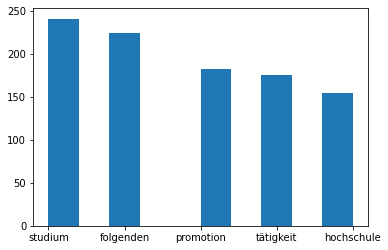

In [53]:
from matplotlib.pyplot import hist

hist(new_df[0:5].Word, weights=new_df[0:5].Frequency)

In [54]:
#Calculating Document Frequency

from collections import defaultdict
import math

DF = {}
for i in range(len(data['clean_text'])):
    tokens = nltk.word_tokenize(data['clean_text'][i]) #without nltk.word_tokenize, it gives character level DF
    for w in tokens:
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}

In [55]:
len(DF) #Total Unique words

7264

In [56]:
for word,freq in DF.items():
    print(word,len(freq))

Die 16
Hochschule 18
an 19
der 19
Sie 19
im 19
Dezember 3
zur 17
Promotion 14
registriert 2
waren 15
hat 13
ebenfalls 1
Interesse 11
daran 5
mehr 15
über 17
die 19
Promotionsbedingungen 1
ihrer 6
Promovierenden 3
zu 19
erfahren 5
. 19
Um 10
Doppelbefragungen 1
vermeiden 4
möchten 8
wir 11
von 19
Ihnen 16
innerhalb 10
dieses 7
Fragebogens 1
angegebenen 4
Antworten 2
Ihre 18
zum 17
Zweck 3
Qualitätssicherung 1
und 19
Evaluation 2
Bereich 4
Doktorandenausbildung 2
Ihr 18
Einverständnis 2
vorausgesetzt 1
weiter 6
geben 15
Ja 13
ich 18
bin 16
mit 19
Weitergabe 1
meiner 18
Angaben 7
einverstanden 1
Nein 13
nicht 19
Anfang 4
Ihrer 19
offiziell 3
als 19
Doktorand 3
in 19
In 18
Zwischenzeit 1
kann 13
sich 19
etwas 14
geändert 1
haben 19
Bitte 19
was 8
aktuell 9
auf 18
zutrifft 3
Ich 18
promoviere 6
habe 17
das 18
Promotionsverfahren 1
abgeschlossen 17
mein 15
Promotionsvorhaben 1
unterbrochen 9
abgebrochen 10
Handelt 6
es 18
um 16
eine 19
gemeldete 1
Unterbrechung 2
Können 3
noch 18
erinnern 1


inhaltlichen 3
bisherige 2
Promotionszeit 1
Inwieweit 15
folgende 17
empfinde 2
Dauer 6
bisherigen 7
viel 15
lang 2
Vorgaben 2
Antrag 5
Annahme 1
zuständigen 1
Fakultät 2
Zulassung 5
Promotionsprüfungsverfahren 1
leicht 5
erfüllen 5
Verfahren 8
Wechsel 7
Fakultäten 2
transparent 2
eng 2
kooperativ 1
Stakeholdern 1
Person 4
Gruppe 2
berechtigtes 1
Verlauf 4
Ergebnis 5
Projektes 2
angelegt 1
Forschungsfrage 2
Hilfe 11
konkretisiert 1
verlief 1
unproblematisch 1
thematisch 2
Richtung 1
voraussichtlich 4
zugehörig 2
gesamte 2
gesamten 2
empfunden 1
konnte 7
Abschlussphase 1
formal 2
klar 3
strukturiert 1
Situation 15
Möglichkeit 6
wechseln 4
Kiel 3
angenommen 1
deren 2
Fächerauswahl 1
meinen 17
promotionsqualifizierenden 1
beinhaltet 1
außerakademische 1
Stakeholder 1
involviert 6
aktiv 5
Projekt 3
mitarbeiten 1
Geldgebende 1
Beratende 1
Stiftungen 4
abgebrochene 3
abgebrochenen 1
abgeschlossenen 2
mitgearbeitet 6
Voraussetzung 4
allgemeine 7
Arbeitssituation 1
Zeitpunkt 7
ersten 8
Anstell

berufsintegrierendes 1
duales 3
Fernstudium 4
Zulassungsbedingungen 1
Masterstudiengang 4
Numerus 1
clausus 1
Motivationsschreiben 2
einschlägige 2
fachspezifische 4
Tests 2
Eignungsprüfungen 1
Aufnahmeprüfungen 1
Mindest 1
Abschlussnoten 1
Bachelorstudium 2
Auswahlgespräch 1
Nachweis 1
bestimmten 5
Sprachkenntnissen 1
Verfahrensnote 1
Kombination 1
Fachnoten 1
Einschreiben 1
Übergangsjob 1
Praktika 2
Auslandspraktika 1
Familientätigkeit 1
Reisen 2
Mittel 8
Monat 11
bezogen 4
Verwandte 5
Verdienst 4
BAföG 8
Studienkredit 6
Stipendien 4
Examen 1
anschließende 1
Fort 4
Familien 1
arbeitslos 5
Praktikum 9
selbstständig 3
freiberuflich 2
befristet 4
angestellt 1
Beamte 1
streben 6
nächstes 2
Fortführung 1
gegenwärtigen 4
neues 2
Staantsangehörigkeit 1
zurückdenken 2
Merkmale 1
Vorstellung 1
Vertiefung 1
höheres 1
Berufseinkommen 2
erzielen 3
Student 3
aufrechterhalten 2
Berufsziel 3
voraussetzt 3
akademische 3
Laufbahn 4
einschlagen 4
Lebensphase 1
verlängern 4
Ausbildungs 2
Berufsoption 1

Umweltschutzes 1
wirtschaftlichem 1
Wachstum 1
Vollendung 1
wirtschaftlichen 1
Integration 1
Europas 1
stärkere 1
personelle 1
Entwicklungsländer 1
Abwehr 1
kultureller 2
Überfremdung 1
Reduzierung 1
Wohlfahrtstaates 1
Sicherungssysteme 1
vielleicht 1
vereinfacht 1
links 2
politisch 1
unterschiedliche 2
Meinungen 1
Zuwanderern 1
Zuwanderer 1
Kriminalitätsrate 1
Arbeitsplätze 1
weg 1
bereichern 1
Kulturen 3
Flüchtlinge 1
aufnimmt 1
Krieg 1
Bürgerkrieg 1
geflohen 1
religiösen 2
verfolgt 1
Hunger 1
Naturkatastrophen 1
Heimatland 1
Zugehörigkeit 1
Volksgruppe 1
Auskommen 1
wiedergeben 1
fachliches 1
Sachverhalte 1
Bedeutung 5
Überlegungen 1
Benotung 1
hängt 1
Tagesform 1
Notengebung 1
erheblich 1
Professors 1
Professorin 2
zusätzliche 3
besorgt 1
unterschiedlichen 1
Arten 1
lerne 1
benötige 2
gestellte 1
unbedingt 4
wahrscheinliche 1
auswendig 1
sehe 5
Sinn 5
darin 2
irgendeiner 7
abgefragt 1
Außerhalb 2
beschäftige 1
breiteren 1
setzen 2
Begründungen 1
Inhalt 2
Am 1
Tag 3
unklar 2
Studien

Januar 2
Mitantragsteller 1
Mitantragstellerin 1
Drittmittelanträge 1
Förderer 1
berücksichtigen 2
Volumen 1
abgelehnt 4
abgelehnten 1
Drittmittelantrag 1
Förderorganisationen 1
Nach 3
Ablehnung 1
überarbeitet 1
Förderorganisation 1
vergleichbarer 1
Begründung 1
Auszügen 1
Gutachterkommentaren 1
gerecht 1
ungerecht 1
leistungsabhängige 1
Mittelvergabe 1
Ko 1
Autor 1
Autorin 1
empfinden 1
äußerst 1
starken 1
Manuskripte 1
Autorschaft 1
Änderungswünsche 1
minor 1
major 1
revisions 1
akzeptiert 1
mögliche 4
Mittelgeber 1
Acknowledgments 1
aufführen 1
gebe 3
beteiligten 1
Wieviel 2
notwendigen 1
Aufwendungen 1
Sachmittel 1
Grundfinanzierung 1
Grundausstattung 1
Betreuen 1
ZweitbetreuerIn 1
ErstbetreuerIn 1
Erst 1
Kriterien 2
aufgelistet 1
Beurteilung 1
Dissertationsleistungen 1
herangezogen 1
wichtigste 1
Forschungsfragen 1
aufwerfen 1
Kenntnisstandes 1
Promotionsfaches 1
Zitierregeln 1
methodisch 1
sauber 1
bearbeitet 2
zweitwichtigste 1
verbindliche 1
Erfassung 1
Hat 3
Promotionsbetreuer

Wolfenb 1
Wolfsburg 1
Salzgitter 1
Suderburg 1
HHG 1
Holzminden 1
FHDW 1
Celle 1
Diepholz 1
Ottersberg 1
Lingen 1
Bremerhaven 1
Intern 1
Gelsenkirchen 1
Bocholt 1
Recklinghausen 1
Juelich 1
Bad 1
Honnef 1
Minden 1
Velbert 1
Heiligenhaus 1
BITS 1
Mittelstandes 1
Gummersbach 1
Leverkusen 1
Niederrhein 1
Krefeld 1
Moenchengladb 1
Ostwestf 1
Lippe 1
Lemgo 1
Hoexter 1
Steinfurt 1
Gladbach 1
Mettmann 1
TFH 1
Georg 1
Agricola 1
Rheinische 1
RW 1
NRW 1
oeffentl 1
Verw 1
Finanzen 1
Norddkirchen 1
Dieburg 1
Mittelhessen 1
Friedberg 1
Wetzlar 1
RheinMain 1
Geisenheim 1
Ruesselsheim 1
Wiesbaden 1
Fresenius 1
Idstein 1
Deu 1
Gesetzl 1
Unfallvers 1
HSersfeld 1
BS 1
Fin 1
Manag 1
Nordhessen 1
Sooden 1
Allendorf 1
Erft 1
Bruehl 1
Freikirche 1
Elstal 1
Bingen 1
Pirmasens 1
Zweibruecken 1
Hoehr 1
Grenzhausen 1
Remagen 1
Birkenfeld 1
Idar 1
Oberstein 1
Bundesbank 1
Hachenburg 1
Mayen 1
Ludwigshafen 1
Worms 1
Erding 1
Provadis 1
Sch 1
Aalen 1
Biberach 1
Esslingen 1
Goeppingen 1
Furtwangen 1
Villingen 1
Sc

Verein 1
Wohlfahrtsverband 1
Träger 1
Sommer 1
Winter 1
Muter 1
Großvater 1
Großmutter 1
unserer 1
Bevölkerungsgruppen 1
Skala 1
aufgewachsen 1
einzuordnen 1
Westphalen 1
Schultyp 1
Stadtteilschule 1
integrative 1
Sekundarschule 1
freier 1
BerufskollegBerufsfachschule 1
Berufskolleg 1
Erzieher 1
dreijähriger 1
Eignungsfeststellung 1
Februar 1
März 1
April 1
Juli 1
August 1
September 1
November 1
Mahlzeit 1
Mo 1
Tageshauptmahlzeit 1
Kleinere 1
Mahlzeiten 2
verteilt 1
Habe 1
Besitzen 1
Spätaussiedler 1
Einbürgerung 1
besaßen 1
Zuzug 1
Staat 1
besaß 1
Spätaussiedlerin 1
besitzt 1
passend 1
insbesondere 1
Studierender 1
eingehen 1
Kombi 1
Fächern 1
Förder 1
erstes 1
Unterrichtsfach 1
Ingenieurwissenschaften 1
Geisteswissenschaften 1
Pädagogik 1
Religionswissenschaften 1
Naturwissenschaften 1
Geographie 1
Gesundheitswissenschaften 1
Forst 1
Ernährungswissenschaften 1
Sportwissenschaften 1
Sportpädagogik 1
Sportpsychologie 1
Vollzeitstudiengang 1
Teilzeitstudiengang 1
individuelle 1
Teilzeit

In [57]:
df_list=[]
for word,freq in DF.items():
    df_list.append(tuple((word,len(freq)/19)))

In [58]:
df_list.sort(key=lambda x:x[1])

In [59]:
df_list

[('ebenfalls', 0.05263157894736842),
 ('Promotionsbedingungen', 0.05263157894736842),
 ('Doppelbefragungen', 0.05263157894736842),
 ('Fragebogens', 0.05263157894736842),
 ('Qualitätssicherung', 0.05263157894736842),
 ('vorausgesetzt', 0.05263157894736842),
 ('Weitergabe', 0.05263157894736842),
 ('einverstanden', 0.05263157894736842),
 ('Zwischenzeit', 0.05263157894736842),
 ('geändert', 0.05263157894736842),
 ('Promotionsverfahren', 0.05263157894736842),
 ('Promotionsvorhaben', 0.05263157894736842),
 ('gemeldete', 0.05263157894736842),
 ('erinnern', 0.05263157894736842),
 ('Quartal', 0.05263157894736842),
 ('zugelassen', 0.05263157894736842),
 ('cotutelle', 0.05263157894736842),
 ('thèse', 0.05263157894736842),
 ('UdS', 0.05263157894736842),
 ('Beschäftigte', 0.05263157894736842),
 ('attraktiv', 0.05263157894736842),
 ('Arbeitgeberin', 0.05263157894736842),
 ('unattraktiv', 0.05263157894736842),
 ('Einsparungen', 0.05263157894736842),
 ('vorgenommen', 0.05263157894736842),
 ('führten',

In [60]:
word_counts = [x[1] for x in df_list]

In [61]:
from collections import Counter
df_analysis = pd.DataFrame.from_dict(Counter(word_counts), orient='index').reset_index()

In [62]:
df_analysis

,index,0
0,0.052632,4280
1,0.105263,1290
2,0.157895,520
3,0.210526,287
4,0.263158,241
5,0.315789,152
6,0.368421,92
7,0.421053,73
8,0.473684,54
9,0.526316,54


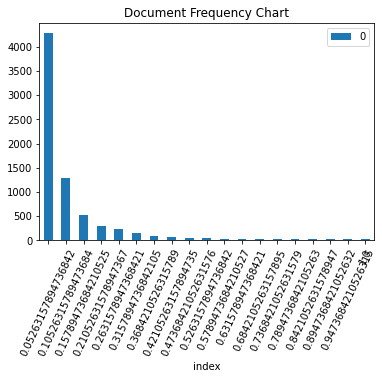

In [63]:
import matplotlib.pyplot as plot
# Draw a vertical bar chart

df_analysis.plot.bar(x="index", y=0, rot=65, title="Document Frequency Chart");

plot.show(block=True);

In [135]:
from sklearn.feature_extraction.text import CountVectorizer 

cv=CountVectorizer(stop_words=stop_words,ngram_range=(1,1)) # min_df =0.05263 # trying different things

word_count_vector=cv.fit_transform(lemmatized_corpus)

/home/pawan/.local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ernst', 'ordnung', 'schluss'] not in stop_words.
  % sorted(inconsistent)


In [136]:
#the numbers are not counts, they are the position in the sparse vector.
cv.vocabulary_

{'hochschule': 2244,
 'dezember': 1070,
 'promotion': 3535,
 'registrieren': 3709,
 'ebenfalls': 1176,
 'interesse': 2387,
 'promotionsbedingung': 3540,
 'promovierenden': 3569,
 'erfahren': 1377,
 'doppelbefragung': 1123,
 'vermeiden': 4689,
 'innerhalb': 2358,
 'fragebogen': 1766,
 'angegeben': 161,
 'antwort': 232,
 'zweck': 5190,
 'qualitätssicherung': 3640,
 'evaluation': 1498,
 'bereich': 658,
 'doktorandenausbildung': 1112,
 'einverständnis': 1274,
 'voraussetzen': 4814,
 'weitergabe': 4915,
 'angabe': 156,
 'einverstand': 1273,
 'anfang': 147,
 'offiziell': 3305,
 'doktorand': 1110,
 'zwischenzeit': 5208,
 'ändern': 5219,
 'aktuell': 92,
 'zutreffen': 5175,
 'promovieren': 3567,
 'promotionsverfahren': 3562,
 'abschließen': 31,
 'promotionsvorhaben': 3563,
 'unterbrechen': 4545,
 'abbrechen': 2,
 'handeln': 2127,
 'gemeldet': 1929,
 'unterbrechung': 4546,
 'erinnern': 1414,
 'quartal': 3644,
 'arbeit': 249,
 'beginnen': 595,
 'zulassen': 5136,
 'darüb': 1017,
 'informieren': 23

In [137]:
word_count_vector.shape
#We have 19 (rows) documents and 3003 unique words (columns)!
# With stopwords

(19, 5272)

In [138]:
cv.stop_words #gives you the stop words that CountVectorizer inferred from your min_df and max_df settings as well as those that were cut off during feature selection (through the use of max_features)

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [139]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)

tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [140]:
feature_names=cv.get_feature_names()

/home/pawan/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
# feature_names.index('mobilität')

In [71]:
# def sort_coo(coo_matrix):
#     tuples = zip(coo_matrix.col, coo_matrix.data)
#     return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

# def extract_topn_from_vector(feature_names, sorted_items, topn):
#     """get the feature names and tf-idf score of top n items"""
    
#     #use only topn items from vector
#     sorted_items = sorted_items[:topn]

#     score_vals = []
#     feature_vals = []
    
#     # word index and corresponding tf-idf score
#     for idx, score in sorted_items:
        
#         #keep track of feature name and its corresponding score
#         score_vals.append(round(score, 3))
#         feature_vals.append(feature_names[idx])

#     #create a tuples of feature,score
#     #results = zip(feature_vals,score_vals)
#     results= {}
#     for idx in range(len(feature_vals)):
#         results[feature_vals[idx]]=score_vals[idx]
    
#     return results

# def get_keywords(vectorizer, feature_names, doc):
#     """Return top k keywords from a doc using TF-IDF method"""

#     #generate tf-idf for the given document
#     tf_idf_vector = vectorizer.transform(cv.transform([doc]))
    
#     #sort the tf-idf vectors by descending order of scores
#     sorted_items=sort_coo(tf_idf_vector.tocoo())

#     #extract only TOP_K_KEYWORDS
#     keywords=extract_topn_from_vector(feature_names,sorted_items,400)
    
#     return (keywords)


In [164]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform(cv.transform([doc]))
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items)
    
    return (keywords)


In [165]:
result = []
for doc in lemmatized_corpus:
    df = {}
    df['Text'] = doc
    df['top_keywords'] = get_keywords(tfidf_transformer, feature_names, doc)
    result.append(df)
    
final = pd.DataFrame(result)
final

,Text,top_keywords
0,der Hochschule an der ich im Dezember zur Prom...,"{'promotion': 0.371, 'betreuer': 0.19, 'thema'..."
1,wie sein dies studienvorbereitend Kurs verlauf...,"{'kurs': 0.468, 'vorbereitungskurs': 0.286, 'a..."
2,welch Studienabschluss haben ich in mein letzt...,"{'masterstudium': 0.572, 'studium': 0.294, 'ma..."
3,an welch Art Hochschule studieren ich . Univer...,"{'völlig': 0.532, 'lehnen': 0.303, 'akzeptiere..."
4,wie werden ich mein derzeitig Tätigkeit bzw. S...,"{'mitarbeiter': 0.301, 'weiterbildung': 0.234,..."
5,Ware oder sein ich seit der letzter Befragung ...,"{'letzter': 0.295, 'beruflich': 0.255, 'tätigk..."
6,wie zufried sein ich mit mein bisherig Bildung...,"{'studium': 0.424, 'aufnehmen': 0.201, 'berufl..."
7,In welch Sprache mögen ich der Befragung durch...,"{'value': 0.51, 'kollege': 0.184, 'difference'..."
8,Ware oder sein ich seit der letzter Befragung ...,"{'weiterbildung': 0.282, 'ausland': 0.274, 'be..."
9,welch Abschluss streben ich in mein derzeitig ...,"{'berlin': 0.342, 'muenchen': 0.208, 'koeln': ..."


In [149]:
len(final['top_keywords'][0]) # document 8 have 189 keywords(<topk(200)) and document 14 have 187 keywords

1112

In [75]:
final['Valid_Ground_Truth']= data ['Valid_Ground_Truth']

In [166]:
final['top_keywords'][5] #arbeitsbedingung

{'letzter': 0.295,
 'beruflich': 0.255,
 'tätigkeit': 0.226,
 'angabe': 0.212,
 'ausland': 0.187,
 'wissenschaftlich': 0.178,
 'aufsatz': 0.169,
 'stelle': 0.164,
 'professur': 0.157,
 'befragung': 0.147,
 'antrag': 0.143,
 'fachzeitschrift': 0.138,
 'folgend': 0.128,
 'wissenschaft': 0.116,
 'weiterbildung': 0.115,
 'verfahren': 0.115,
 'netzwerk': 0.115,
 'forschungs': 0.115,
 'review': 0.112,
 'handeln': 0.11,
 'anzahl': 0.105,
 'genau': 0.102,
 'peer': 0.098,
 'partner': 0.094,
 'verfügen': 0.091,
 'marke': 0.091,
 'gebrauchsmuster': 0.091,
 'station': 0.084,
 'patent': 0.084,
 'bewilligen': 0.084,
 'eingetragen': 0.082,
 'aufgabe': 0.078,
 'wichtig': 0.074,
 'grund': 0.074,
 'neigen': 0.074,
 'ausführen': 0.074,
 'tätig': 0.069,
 'fest': 0.069,
 'publikation': 0.069,
 'forschungsbezug': 0.069,
 'treffen': 0.067,
 'aktivität': 0.065,
 'innerhalb': 0.061,
 'namentlich': 0.061,
 'nachvollziehen': 0.061,
 'erfinder': 0.061,
 'designs': 0.061,
 'dah': 0.061,
 'chronologisch': 0.061,
 '

In [162]:
lemmatized_corpus[5]

'Ware oder sein ich seit der letzter Befragung im in irgendeiner Form erwerbstätig . Bitte geben ich mit Hilfe der Zeilennummer an bei welch Stelle ich sich um mein aktuell Stelle handeln . handeln ich sich bei sich letzter beruflich Station um derselbe Stelle der ich zum Zeitpunkt der letzter Befragung im ausüben haben . handeln ich sich bei sich letzter Stelle um einen Tätigkeit in der Wissenschaft . welch der folgend Personalkategorie können ich sich zuordnen . Ware ich zuletzt im öffentlich Dienst bzw. einer der öffentlich Dienst tariflich angeglichen Arbeitsverhältnis beschäftigen . wie viel Mitarbeiter innen sein bei mein Arbeitgeber beschäftigen . welch Wirtschaftsbereich gehören der Betrieb bzw. der Einrichtung in der der ich arbeiten schwerpunktmäßig an . Haben ich zuletzt in einer Position arbeiten in der . wie viel Euro pro Jahr erhalten ich darüb hinaus jährlich in Form von Zulage . Haben ich vor sich beruflich selbständig zu machen . In welch Form sein ich als Selbständige

In [163]:
keywords_within_text[5]

['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt']

In [152]:
# final['top_keywords'][5]['arbeitsbedingung'] = final['top_keywords'][5].pop('arbeitsbedingung')

In [154]:
# final['top_keywords'][5]['Auslandsaufenthalt'] = final['top_keywords'][5].pop('auslandsaufenthalt')

In [155]:
final['top_keywords'][5]

{'letzter': 0.295,
 'beruflich': 0.255,
 'tätigkeit': 0.226,
 'angabe': 0.212,
 'ausland': 0.187,
 'wissenschaftlich': 0.178,
 'aufsatz': 0.169,
 'stelle': 0.164,
 'professur': 0.157,
 'befragung': 0.147,
 'antrag': 0.143,
 'fachzeitschrift': 0.138,
 'folgend': 0.128,
 'wissenschaft': 0.116,
 'weiterbildung': 0.115,
 'verfahren': 0.115,
 'netzwerk': 0.115,
 'forschungs': 0.115,
 'review': 0.112,
 'handeln': 0.11,
 'anzahl': 0.105,
 'genau': 0.102,
 'peer': 0.098,
 'partner': 0.094,
 'verfügen': 0.091,
 'marke': 0.091,
 'gebrauchsmuster': 0.091,
 'station': 0.084,
 'patent': 0.084,
 'bewilligen': 0.084,
 'eingetragen': 0.082,
 'aufgabe': 0.078,
 'wichtig': 0.074,
 'grund': 0.074,
 'neigen': 0.074,
 'ausführen': 0.074,
 'tätig': 0.069,
 'fest': 0.069,
 'publikation': 0.069,
 'forschungsbezug': 0.069,
 'treffen': 0.067,
 'aktivität': 0.065,
 'innerhalb': 0.061,
 'namentlich': 0.061,
 'nachvollziehen': 0.061,
 'erfinder': 0.061,
 'designs': 0.061,
 'dah': 0.061,
 'chronologisch': 0.061,
 '

In [156]:
top_keywords = []
for i in range (len(final['top_keywords'])):
    sorted_footballers_by_goals = sorted(final['top_keywords'][i].items(), key=lambda x:x[1], reverse=True)
    top_keywords.append(dict(sorted_footballers_by_goals))
    

In [157]:
len(top_keywords[0])

1112

In [76]:
#for uniqueness

In [77]:
# #Calculating Document Frequency

# from collections import defaultdict
# import math

# DF2 = {}
# for i in range(len(final)):
#     for elem in list((final['top_keywords'])[i].keys()):
#         tokens = nltk.word_tokenize(elem) #without nltk.word_tokenize, it gives character level DF
#         for w in tokens:
#             try:
#                 DF2[w].add(i)
#             except:
#                 DF2[w] = {i}

In [78]:
# DF2

In [79]:
# len(DF2)

In [80]:
# for word,freq in DF2.items():
#     print(word,len(freq))

In [81]:
# df_list1=[]
# for word,freq in DF2.items():
#     df_list1.append(tuple((word,len(freq)/19)))

In [82]:
# df_list1

In [83]:
# for uniquenees we can take the amount(count/Frequency) of documents that a keyword occurs in and then dividing it by the total amount of documents.(Document frequency)

# something that comes in 19 out of 19 questionnaire, we can be sure that it is not unique and something that comes in 1 out of 19 it’s very unique.

# we can define a threshold on document frquency and based on that can define the uniqueness/decisiveness of keyword
# for i in range(len(final)):
#     for elem in list((final['top_keywords'])[i].keys()):
        

In [84]:
final['Ground_Truth']= data['Ground_Truth']

In [167]:
predicted=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(final['top_keywords'])):
    predicted.append([])           #used for nested list
    for j in range(1,int(len(final['top_keywords'][i])/chunk_size)+1):
        predicted[i].append(list(final['top_keywords'][i].keys())[0:j*chunk_size])

In [158]:
predicted=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(top_keywords)):
    predicted.append([])           #used for nested list
    for j in range(1,int(len(top_keywords[i])/chunk_size)+1):
        predicted[i].append(list(top_keywords[i].keys())[0:j*chunk_size])

In [112]:
predicted[11][-1]  #predicted[0][-1] shows all the keywords in document 0, that is 200 keywords

['letzten',
 'weiterbildung',
 'angaben',
 'monaten',
 'beruflichen',
 'ausland',
 'beendet',
 'aufsätze',
 'stelle',
 'professur',
 'tätigkeit',
 'fachzeitschriften',
 'anträge',
 'wissenschaft',
 'befragung',
 'begonnen',
 'verfahren',
 'forschungs',
 'review',
 'körperliche',
 'handelt',
 'behinderung',
 'anzahl',
 'peer',
 'partner',
 'wochen',
 'verfüge',
 'patente',
 'netzwerk',
 'marken',
 'gebrauchsmuster',
 'aktivitäten',
 'bewilligt',
 'hauptwohnsitz',
 'wissenschaftliche',
 'wissenschaftlicher',
 'berufliches',
 'wichtig',
 'gründe',
 'zählen',
 'seelisches',
 'mentor',
 'tätig',
 'publikationen',
 'forschungsbezug',
 'befinden',
 'folgenden',
 'ziele',
 'fachärztin',
 'fachzahnärztin',
 'fachtierärztin',
 'fachtierarzt',
 'facharzt',
 'fachanwältin',
 'fachanwalt',
 'kinder',
 'zuletzt',
 'verdienen',
 'innerhalb',
 'haushalt',
 'namentlich',
 'nachvollziehen',
 'handelte',
 'genauere',
 'gearbeitet',
 'erfinder',
 'designs',
 'chronologisch',
 'wissenschaftlichen',
 'wicht

In [87]:
# arbeitsbedingungen
# arbeitsbedingungen

In [88]:
# import spacy

# nlp = spacy.load('de_core_news_lg')  # make sure to use larger model!
# tokens = nlp(u'arbeitsbedingung')
# similar_word = nlp(u'arbeitsbedingungen')

# if(similar_word and similar_word.vector_norm):
#   for token in tokens:
#     if(token and token.vector_norm):
#       print(token.text, similar_word.similarity(token))

In [113]:
# similar_word.vector_norm

In [ ]:
# import spacy
# nlp = spacy.load('de_core_news_md')
# nlp('auslandsaufenthalte').similarity(nlp('auslandsaufenthalt'))

In [ ]:
#nlp('techniker').similarity(nlp('techniken'))

In [168]:
def metric_values(nlp,proposed,keywords_within_text):
    proposed_set = list(set(proposed))
    true_set = list(set(keywords_within_text))
    precision_values = []
    recall_values = []
    F1_values = []
    true_positives = 0
    #number_of_keywords = 0
    for i in range(len(proposed_set)):
        #exact_match = False
        for j in range(len(true_set)):
            if nlp(proposed_set[i]).similarity(nlp(true_set[j])) > 0.96:
                print(proposed_set[i],true_set[j])
                #exact_match = True
                true_positives = true_positives + 1
                break
        precision =  true_positives/(i+1)
        recall =  true_positives/float(len(true_set))
        if precision == 0 and recall == 0:
            F1 = 0
        else:
            F1 =  2*precision*recall/float(precision + recall)
        precision_values.append(precision)
        recall_values.append(recall)
        F1_values.append(F1)

        
        
    return (precision_values, recall_values, F1_values)

In [169]:
recall_values

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

Graph for document 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  if sys.path[0] == '':


finanzierung finanzierung
promotion promotion
betreuung betreuung
wissenschaftssystem wissenschaftssystem
gesundheit gesundheit
mobilität mobilität
promovierende promovierende


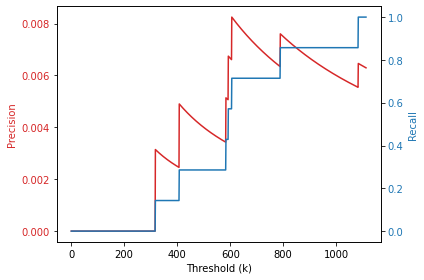

Graph for document 1
geflüchtete geflüchtete
studienvorbereitung studienvorbereitung
studienkolleg studienkolleg


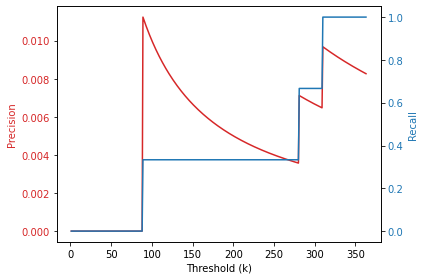

Graph for document 2
masterstudium masterstudium


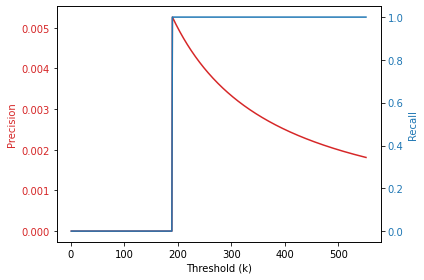

Graph for document 3
studiensituation studiensituation
evaluation evaluation
qualifikation qualifikation


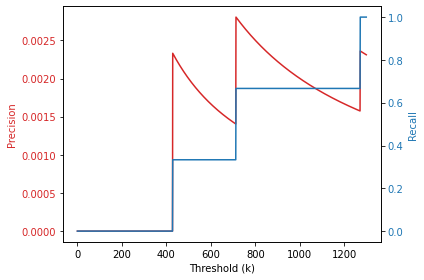

Graph for document 4


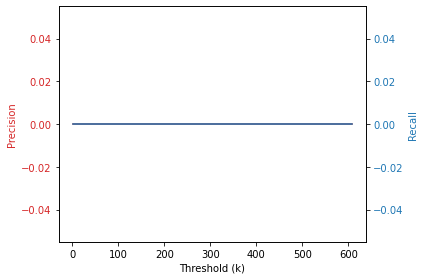

Graph for document 5
promotion promotion
auslandsaufenthalt auslandsaufenthalt
weiterbildung weiterbildung


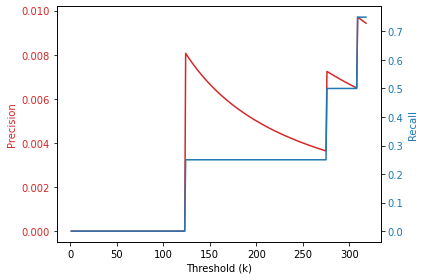

Graph for document 6


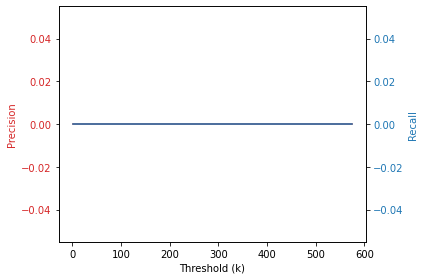

Graph for document 7


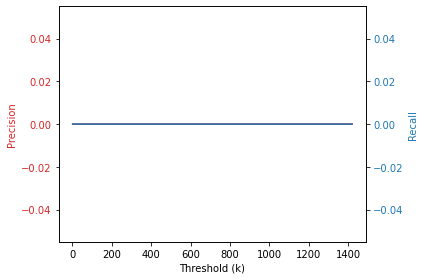

Graph for document 8
promotion promotion
auslandsaufenthalt auslandsaufenthalt
weiterbildung weiterbildung


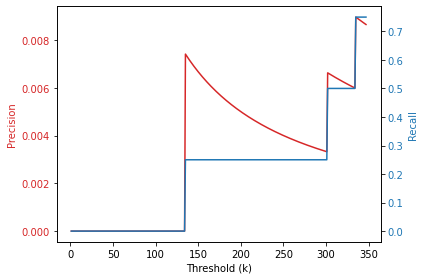

Graph for document 9


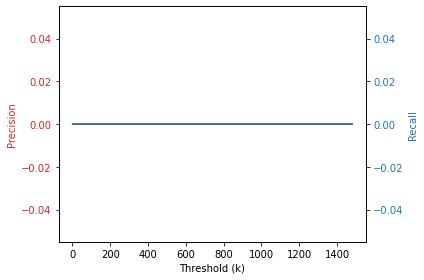

Graph for document 10
geflüchtete geflüchtete
studienvorbereitung studienvorbereitung
studienkolleg studienkolleg


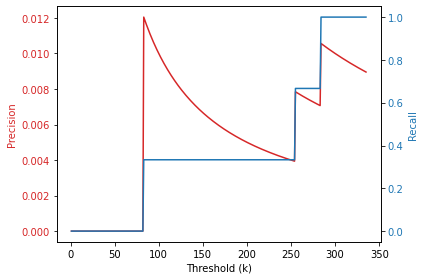

Graph for document 11
promotion promotion
gesundheit gesundheit
auslandsaufenthalt auslandsaufenthalt
weiterbildung weiterbildung


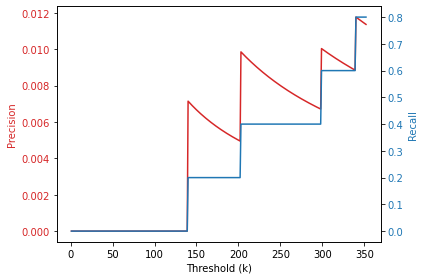

Graph for document 12
studiensituation studiensituation
wohnsituation wohnsituation
corona corona


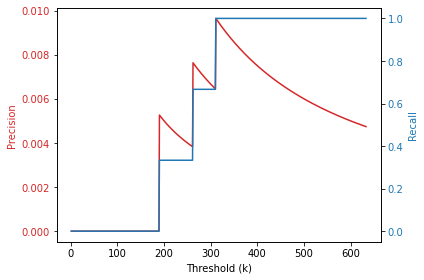

Graph for document 13
promotion promotion
auslandsaufenthalt auslandsaufenthalt
weiterbildung weiterbildung


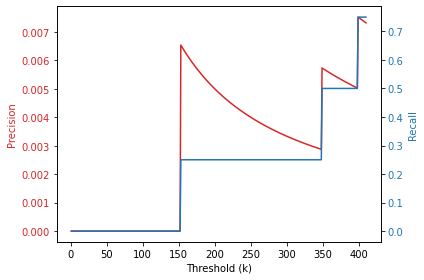

Graph for document 14


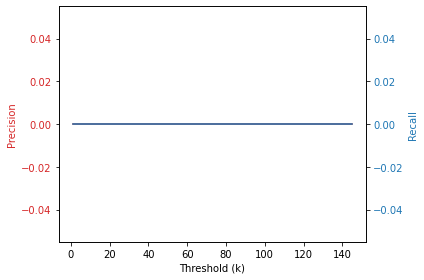

Graph for document 15


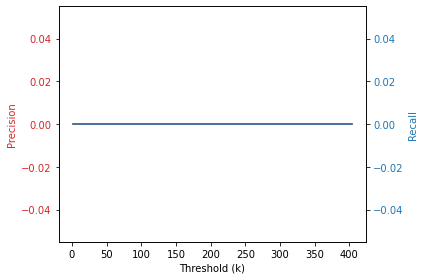

Graph for document 16


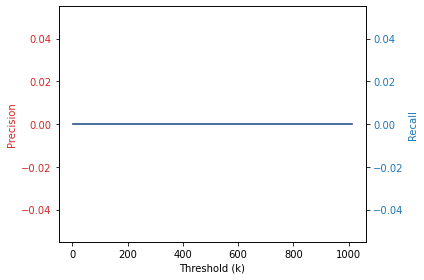

Graph for document 17


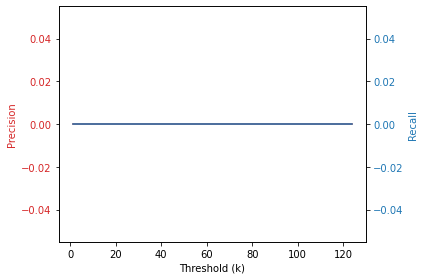

Graph for document 18


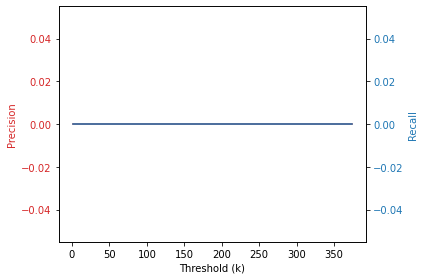

In [170]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(predicted)):
        print("Graph for document "+ str(i))
        
        precison_values, recall_values, _ = metric_values(nlp, predicted[i][-1], keywords_within_text[i])
        
        # Create some mock data
        t = [x for x in range(1,(len(precison_values)+1))]
        data1 = precison_values
        data2 = recall_values

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        fig.patch.set_visible(False)
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [122]:
check_new = [elem for elem in list(final['top_keywords'][11])]
len(check_new)

389

In [123]:
check_new

['letzten',
 'weiterbildung',
 'angaben',
 'monaten',
 'beruflichen',
 'ausland',
 'beendet',
 'aufsätze',
 'stelle',
 'professur',
 'tätigkeit',
 'fachzeitschriften',
 'anträge',
 'wissenschaft',
 'befragung',
 'begonnen',
 'verfahren',
 'forschungs',
 'review',
 'körperliche',
 'handelt',
 'behinderung',
 'anzahl',
 'peer',
 'partner',
 'wochen',
 'verfüge',
 'patente',
 'netzwerk',
 'marken',
 'gebrauchsmuster',
 'aktivitäten',
 'bewilligt',
 'hauptwohnsitz',
 'wissenschaftliche',
 'wissenschaftlicher',
 'berufliches',
 'wichtig',
 'gründe',
 'zählen',
 'seelisches',
 'mentor',
 'tätig',
 'publikationen',
 'forschungsbezug',
 'befinden',
 'folgenden',
 'ziele',
 'fachärztin',
 'fachzahnärztin',
 'fachtierärztin',
 'fachtierarzt',
 'facharzt',
 'fachanwältin',
 'fachanwalt',
 'kinder',
 'zuletzt',
 'verdienen',
 'innerhalb',
 'haushalt',
 'namentlich',
 'nachvollziehen',
 'handelte',
 'genauere',
 'gearbeitet',
 'erfinder',
 'designs',
 'chronologisch',
 'wissenschaftlichen',
 'wicht

In [124]:
keywords_within_text[5]

['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt']

In [125]:
list(set(check_new).intersection(keywords_within_text[11]))

['gesundheit', 'weiterbildung', 'promotion', 'arbeitsbedingungen']

In [ ]:
#Auslandsaufenthalt is  not being covered, because within text the word is 'auslandsaufenthalte'
# or/and arbeitsbedingungen is not being covered because after lemmatization , it has changed to arbeitsbedingung

In [126]:
check_new.index('auslandsaufenthalt') 

ValueError: 'auslandsaufenthalt' is not in list

In [ ]:
# from germalemma import GermaLemma

# lemmatizer = GermaLemma()

# # passing the word and the POS tag ("N" for noun)
# lemma = lemmatizer.find_lemma('arbeitsbedingungen', 'VERB')
# print(lemma)
# # -> lemma is "Feinstaubbelastung"

In [129]:
recall_values

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [127]:
best_recall_indices_new = []
for i in range(len(recall_values)):
    best_recall_indices_new.append(recall_values[i].index(max(recall_values[i])))

AttributeError: 'float' object has no attribute 'index'

In [121]:
best_recall_indices_new

[]

In [ ]:
# import spacy

# doc = nlp(u'arbeitsbedingungen')

# # show universal pos tags
# print(' '.join('{word}/{tag}'.format(word=t.orth_, tag=t.pos_) for t in doc))

In [ ]:

# import spacy
# nlp = spacy.load('de_core_news_lg')

# mails=['arbeitsbedingungen']

# mails_lemma = []

# for mail in mails:
#      doc = nlp(mail)
#      result = ' '.join([x.lemma_ for x in doc]) 
#      mails_lemma.append(result)

In [ ]:
# def replace_keywords(nlp,proposed,keywords_within_text):
#     propose_replaced =[]
#     for i in range(len(proposed)):
#         found_keywords = False
#         for j in range(len(keywords_within_text)):
#             if nlp(proposed[i]).similarity(nlp(keywords_within_text[j])) > 0.96:
#                 propose_replaced.append(keywords_within_text[j])
#                 found_keywords = True
#                 break
#         if not found_keywords:
#             propose_replaced.append(proposed[i])
#     return propose_replaced

In [ ]:
# ######################################################
# # function to evaluate success of keyword extraction #
# ######################################################
# def evaluate_keywords(proposed,only_keywords):
#   """
#   Returns precision, recall, and f1 score for proposed keywords against ground truth
#   """
#   proposed_set = set(proposed)
#   true_set = set(only_keywords)
  
#   true_positives = len(proposed_set.intersection(true_set))
#   if len(proposed_set)==0:
#     precision = 0
#   else:
#     # note denominator reflects total number of words
#     # not total number of unique words
#     precision = true_positives/float(len(proposed)) 
      
#   if len(true_set)==0:
#     recall = 0
#   else:
#     recall = true_positives/float(len(true_set))
  
#   if precision + recall > 0:
#     f1 = 2*precision*recall/float(precision + recall)
#   else:
#     f1 = 0

#   return (precision, recall, f1)

In [ ]:
# # #####################################################
# # function to evaluate success of keyword extraction #
# # #####################################################
# def evaluate_keywords(nlp,proposed,keyphrases_within_text):
#   """
#   Returns precision, recall, and f1 score for proposed keywords against ground truth
#   """
  
#   proposed_set = list(set(proposed))
#   true_set = list(set(keyphrases_within_text))
#   tp_temp = []
  
#   for i in range(len(proposed_set)):
#         for j in range(len(true_set)):
#             if nlp(proposed_set[i]).similarity(nlp(true_set[j])) > 0.96:
#                 tp_temp.append(true_set[j])
#                 break
            
#   true_positives = len(tp_temp)
# #   true_positives = len(proposed_set.intersection(true_set))
#   if len(proposed_set)==0:
#     precision = 0
#   else:
#     # note denominator reflects total number of words
#     # not total number of unique words
#     precision = true_positives/float(len(proposed)) 
      
#   if len(true_set)==0:
#     recall = 0
#   else:
#     recall = true_positives/float(len(true_set))
  
#   if precision + recall > 0:
#     f1 = 2*precision*recall/float(precision + recall)
#   else:
#     f1 = 0

#   return (precision, recall, f1)